In [ ]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### For Both Datasets

In [ ]:
# Importing 1st Dataset
df = pd.read_csv('/content/Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
# Importing 2nd Dataset
df1 = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
df.shape

(768, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
df1.shape

(267, 9)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
df.columns = df.columns.str.strip()
df1.columns = df1.columns.str.strip()

In [ ]:
# Converting date column to datetime64 from object
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-9-8849995f3b3a>:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df['Date'].head()

,Date
0,2019-05-31
1,2019-06-30
2,2019-07-31
3,2019-08-31
4,2019-09-30


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])

<ipython-input-11-695a7991ba53>:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Date'] = pd.to_datetime(df1['Date'])


In [ ]:
df1['Date']

,Date
0,2020-01-31
1,2020-02-29
2,2020-03-31
3,2020-04-30
4,2020-05-31
...,...
262,2020-06-30
263,2020-07-31
264,2020-08-31
265,2020-09-30


In [ ]:
# Removing unnecessary column from df1
df1 = df1.drop(columns=['Region.1'], errors='ignore')
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,15.9129,79.74


In [ ]:
# Checking Duplicate values in dataset and fixing it
df.duplicated().sum()

np.int64(27)

In [ ]:
df = df.drop_duplicates()
df.reset_index(drop = True , inplace = True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(741, 7)

In [ ]:
df.nunique()

,0
Region,28
Date,14
Frequency,2
Estimated Unemployment Rate (%),624
Estimated Employed,740
Estimated Labour Participation Rate (%),626
Area,2


In [ ]:
df1.nunique()

,0
Region,27
Date,10
Frequency,1
Estimated Unemployment Rate (%),252
Estimated Employed,267
Estimated Labour Participation Rate (%),248
longitude,27
latitude,24


In [ ]:
# Performing Data Visualization
def Vsualize(column_name,data):

    values = df[column_name].value_counts().values.round(2)
    index = df[column_name].value_counts().index

    color = sns.color_palette('RdBu')
    plt.figure(figsize=(9,5))
    # pie chart of column
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of {column_name}')
    plt.pie(values, labels=index,autopct='%1.1f%%',colors=color)

    # Distribution of column
    plt.subplot(1, 2, 2)
    sns.histplot(df[column_name])
    plt.ylabel(f'Number of {column_name}')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

In [ ]:
def Visualize(column_name,data):

    values = df1[column_name].value_counts().values.round(2)
    index = df1[column_name].value_counts().index

    color = sns.color_palette('RdBu')
    plt.figure(figsize=(9,5))
    # pie chart of column
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of {column_name}')
    plt.pie(values, labels=index,autopct='%1.1f%%',colors=color)

    # Distribution of column
    plt.subplot(1, 2, 2)
    sns.histplot(df[column_name])
    plt.ylabel(f'Number of {column_name}')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

In [ ]:
object_data =df.select_dtypes(include = 'object')
object_data

,Region,Frequency,Area
0,Andhra Pradesh,Monthly,Rural
1,Andhra Pradesh,Monthly,Rural
2,Andhra Pradesh,Monthly,Rural
3,Andhra Pradesh,Monthly,Rural
4,Andhra Pradesh,Monthly,Rural
...,...,...,...
736,West Bengal,Monthly,Urban
737,West Bengal,Monthly,Urban
738,West Bengal,Monthly,Urban
739,West Bengal,Monthly,Urban


In [ ]:
object_data1 =df1.select_dtypes(include = 'object')
object_data1

,Region,Frequency
0,Andhra Pradesh,M
1,Andhra Pradesh,M
2,Andhra Pradesh,M
3,Andhra Pradesh,M
4,Andhra Pradesh,M
...,...,...
262,West Bengal,M
263,West Bengal,M
264,West Bengal,M
265,West Bengal,M


              Region  count
0     Andhra Pradesh     28
1              Bihar     28
2       Chhattisgarh     28
3              Delhi     28
4          Karnataka     28
5            Gujarat     28
6            Haryana     28
7   Himachal Pradesh     28
8          Jharkhand     28
9        Maharashtra     28
10    Madhya Pradesh     28
11            Kerala     28
12       West Bengal     28
13     Uttar Pradesh     28
14           Tripura     28
15            Odisha     28
16         Rajasthan     28
17            Punjab     28
18         Telangana     28
19        Tamil Nadu     28
20       Uttarakhand     27
21         Meghalaya     27
22             Assam     26
23        Puducherry     26
24               Goa     24
25   Jammu & Kashmir     21
26            Sikkim     17
27        Chandigarh     12


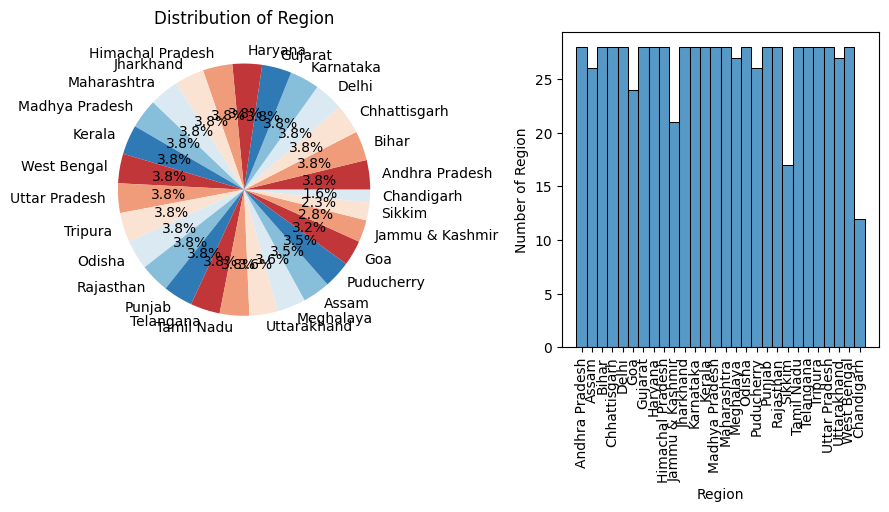

  Frequency  count
0   Monthly    381
1   Monthly    359


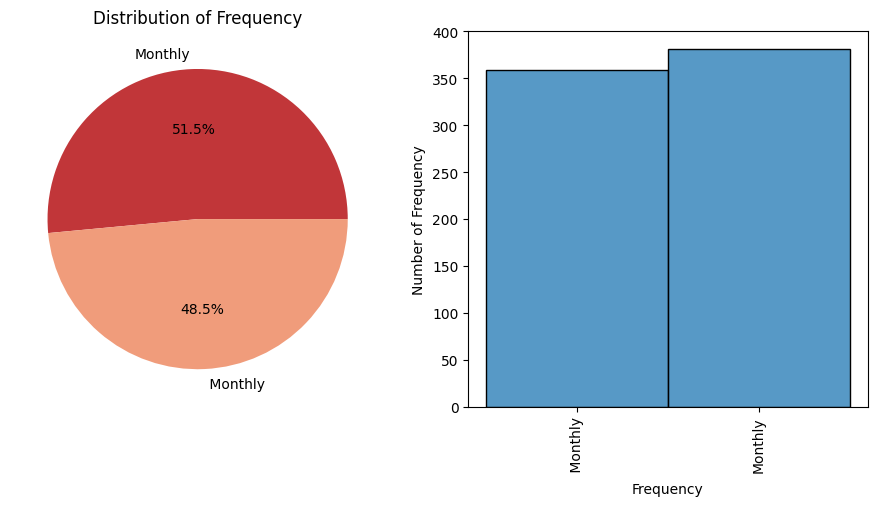

    Area  count
0  Urban    381
1  Rural    359


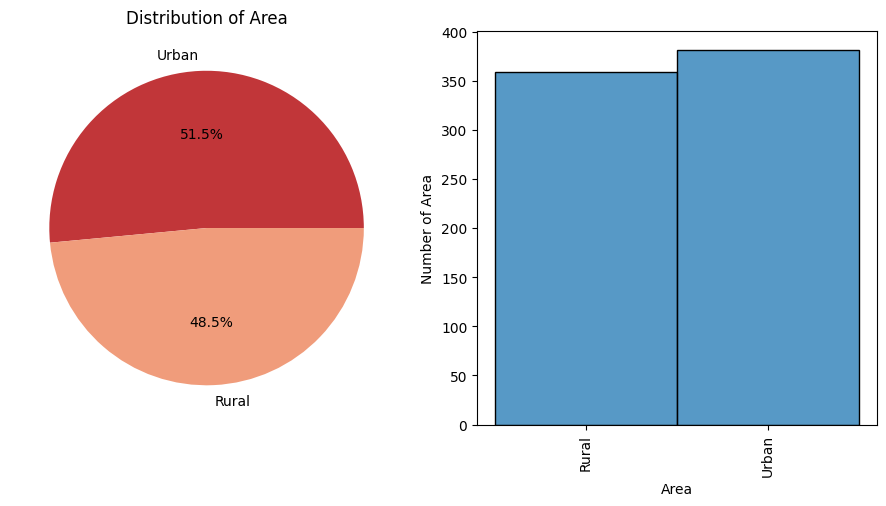

In [ ]:
for column in object_data.columns:
    print(df[column].value_counts().reset_index())
    Vsualize(column ,df)

              Region  count
0     Andhra Pradesh     10
1              Assam     10
2              Bihar     10
3       Chhattisgarh     10
4              Delhi     10
5                Goa     10
6            Gujarat     10
7            Haryana     10
8   Himachal Pradesh     10
9          Jharkhand     10
10         Karnataka     10
11         Rajasthan     10
12            Kerala     10
13    Madhya Pradesh     10
14       Maharashtra     10
15         Meghalaya     10
16            Odisha     10
17        Puducherry     10
18            Punjab     10
19       Uttarakhand     10
20        Tamil Nadu     10
21         Telangana     10
22           Tripura     10
23       West Bengal     10
24     Uttar Pradesh     10
25   Jammu & Kashmir      9
26            Sikkim      8


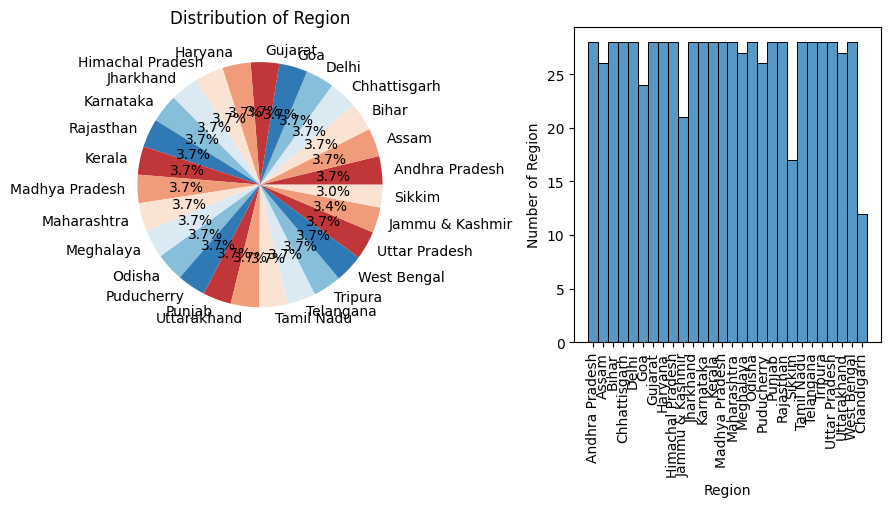

  Frequency  count
0         M    267


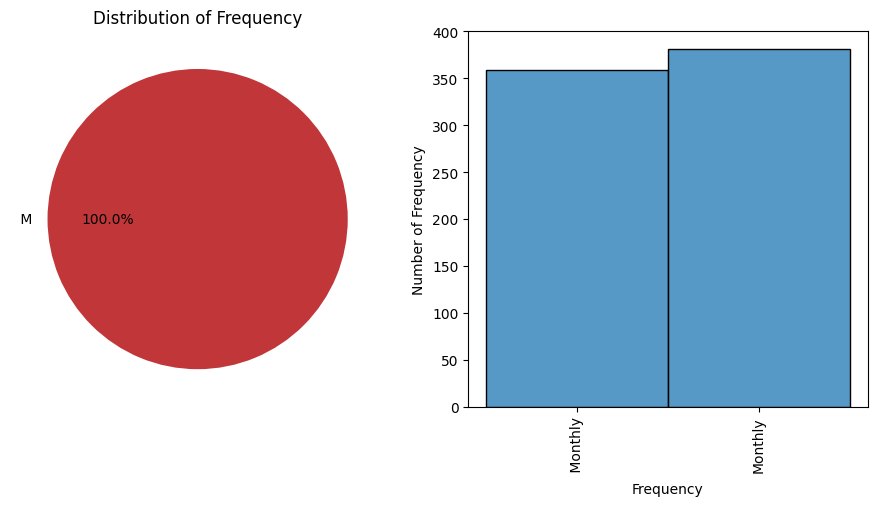

In [ ]:
for column in object_data1.columns:
    print(df1[column].value_counts().reset_index())
    Visualize(column ,df1)

In [ ]:
numeric_data =df.select_dtypes(exclude = 'object')
numeric_data

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
0,2019-05-31,3.65,11999139.0,43.24
1,2019-06-30,3.05,11755881.0,42.05
2,2019-07-31,3.75,12086707.0,43.50
3,2019-08-31,3.32,12285693.0,43.97
4,2019-09-30,5.17,12256762.0,44.68
...,...,...,...,...
736,2020-02-29,7.55,10871168.0,44.09
737,2020-03-31,6.67,10806105.0,43.34
738,2020-04-30,15.63,9299466.0,41.20
739,2020-05-31,15.22,9240903.0,40.67


In [ ]:
numeric_data1 =df1.select_dtypes(exclude = 'object')
numeric_data1

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
0,2020-01-31,5.48,16635535,41.02,15.9129,79.740
1,2020-02-29,5.83,16545652,40.90,15.9129,79.740
2,2020-03-31,5.79,15881197,39.18,15.9129,79.740
3,2020-04-30,20.51,11336911,33.10,15.9129,79.740
4,2020-05-31,17.43,12988845,36.46,15.9129,79.740
...,...,...,...,...,...,...
262,2020-06-30,7.29,30726310,40.39,22.9868,87.855
263,2020-07-31,6.83,35372506,46.17,22.9868,87.855
264,2020-08-31,14.87,33298644,47.48,22.9868,87.855
265,2020-09-30,9.35,35707239,47.73,22.9868,87.855


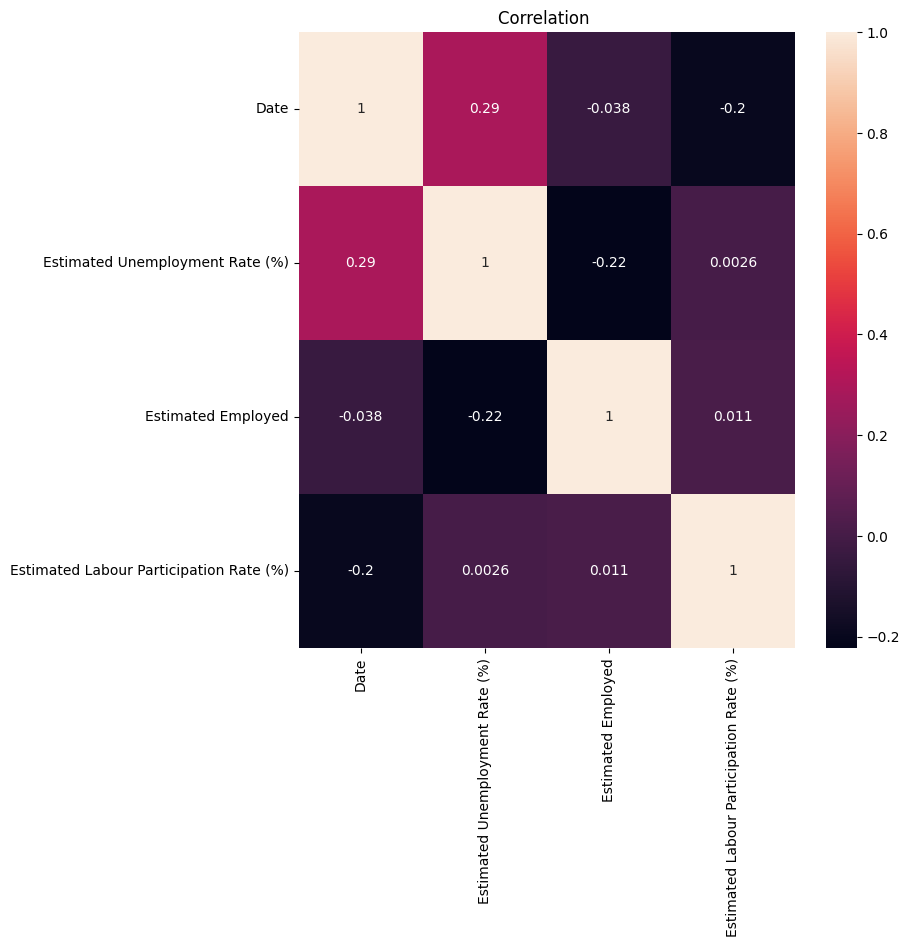

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(numeric_data.corr(), annot=True)
plt.title("Correlation ")
plt.show()

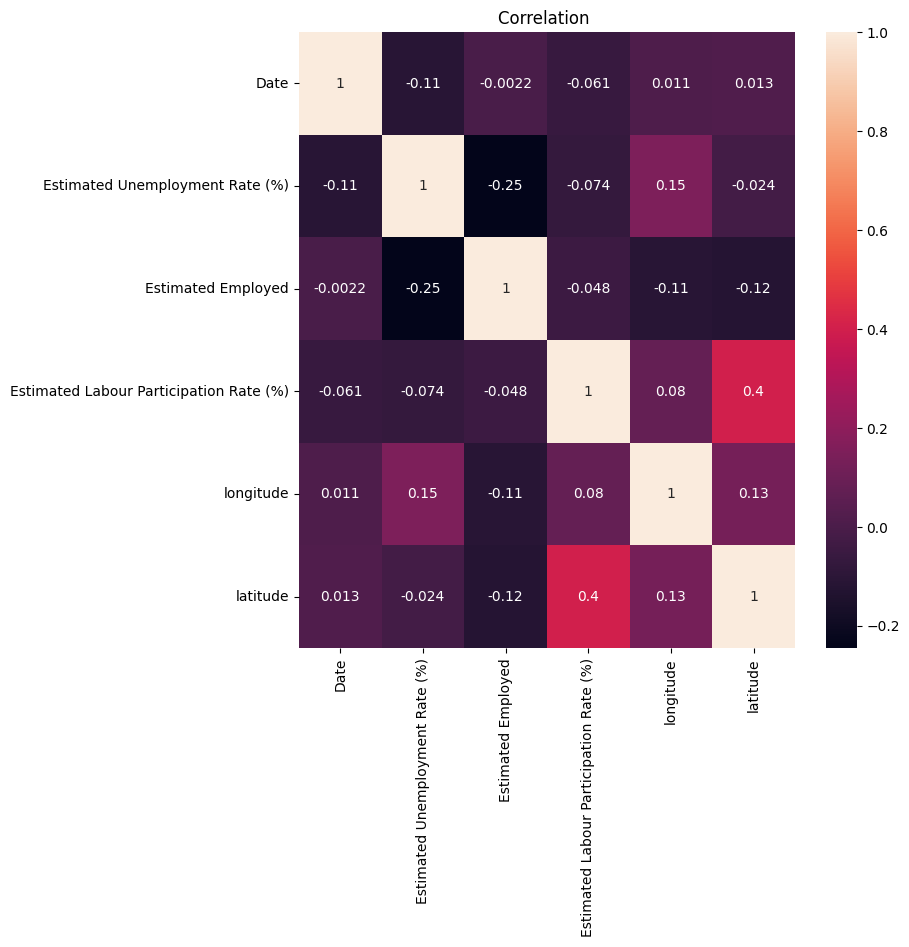

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(numeric_data1.corr(), annot=True)
plt.title("Correlation ")
plt.show()

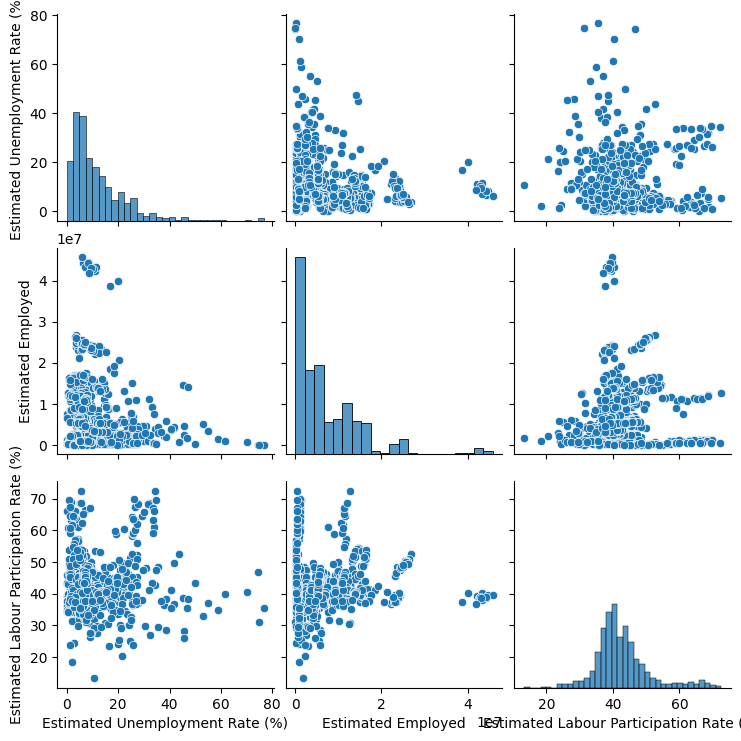

In [ ]:
sns.pairplot(df)

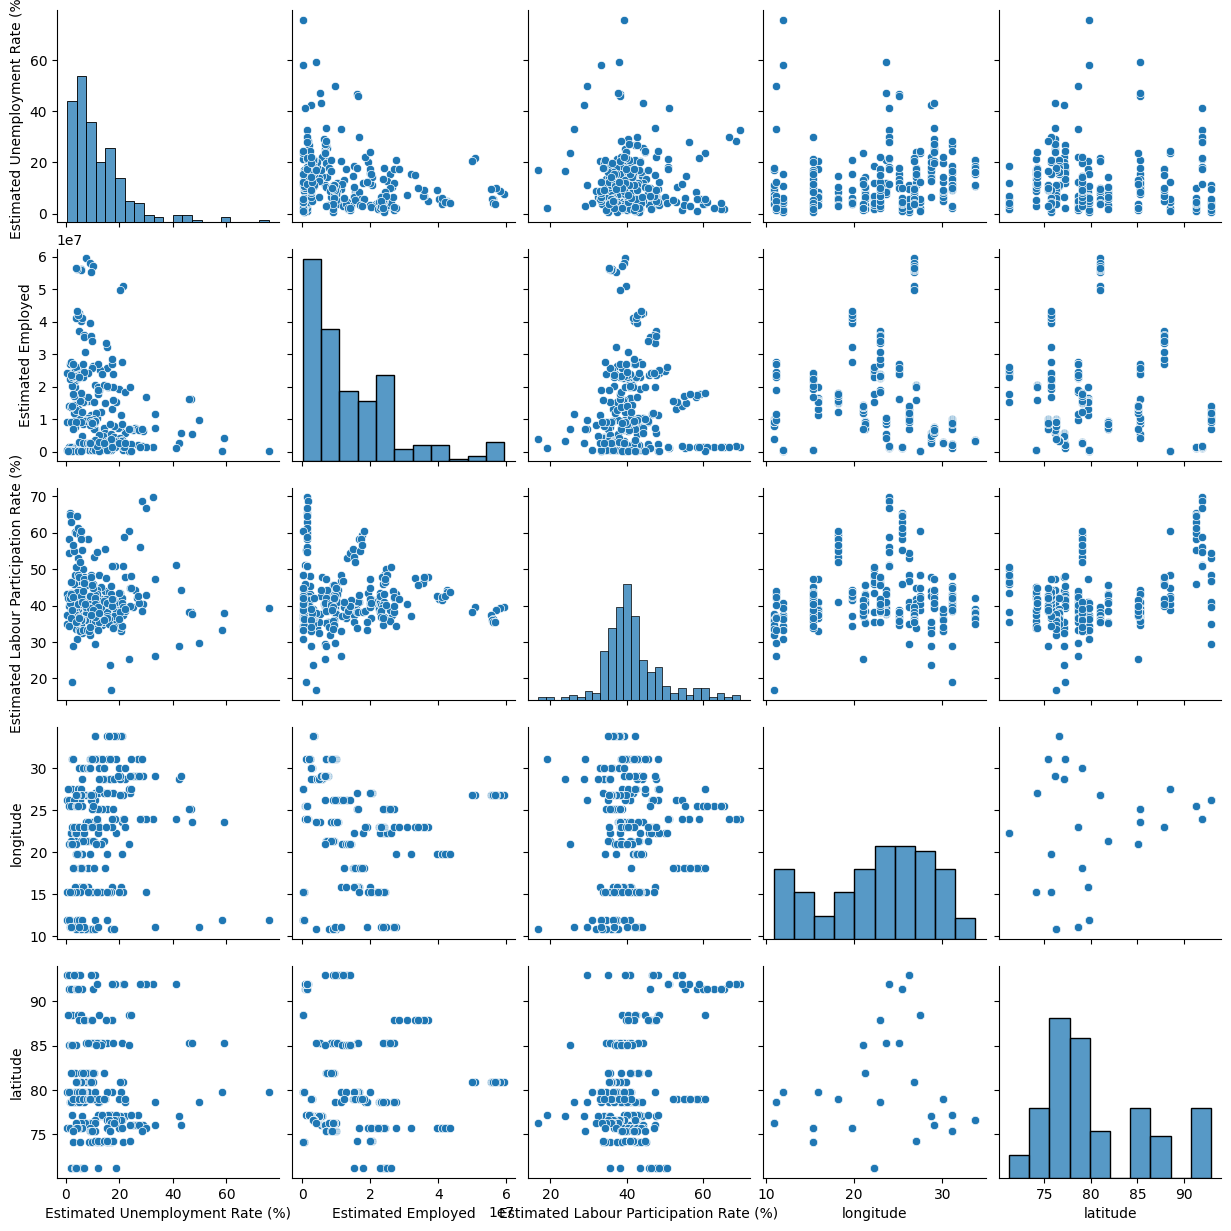

In [ ]:
sns.pairplot(df1)

<ipython-input-33-9f259edbb12d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=df, ci=None, palette="magma")
<ipython-input-33-9f259edbb12d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=df, ci=None, palette="magma")


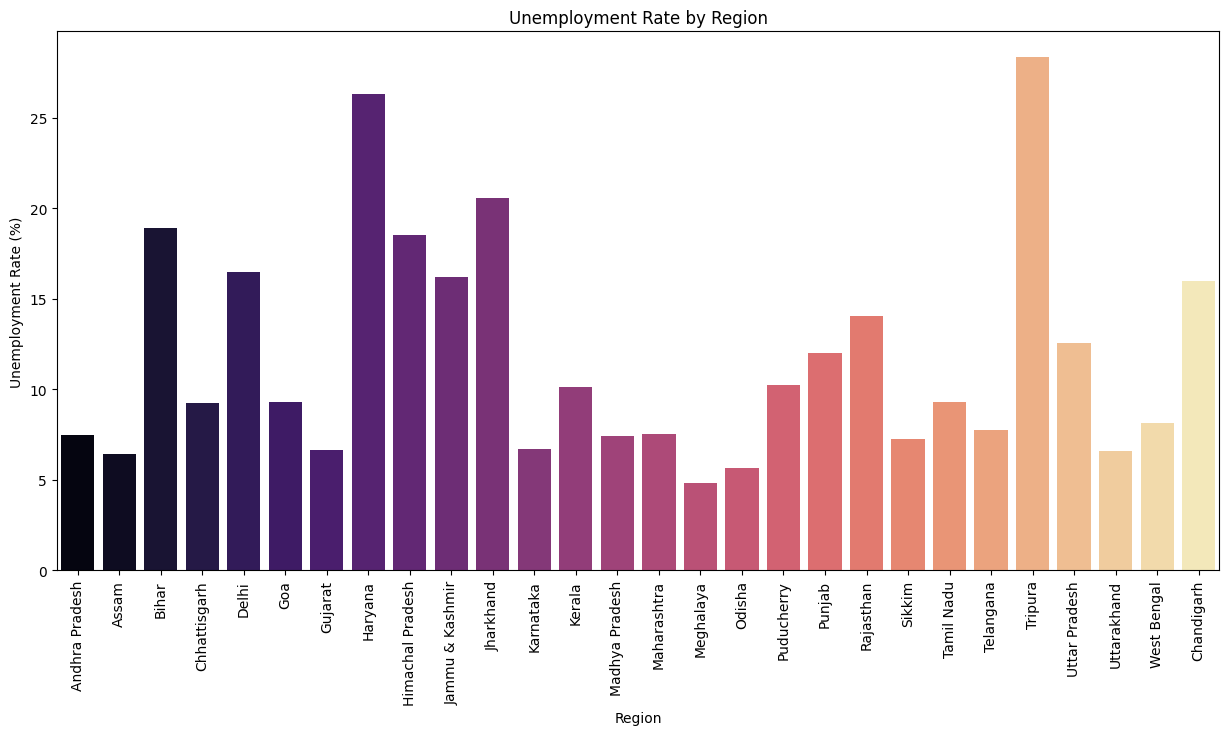

In [ ]:
# Unemployment Rate Distribution by Region
plt.figure(figsize=(15, 7))
sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=df, ci=None, palette="magma")
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Region")
plt.show()

<ipython-input-34-42a69c7be8eb>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=df1, ci=None, palette="magma")
<ipython-input-34-42a69c7be8eb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=df1, ci=None, palette="magma")


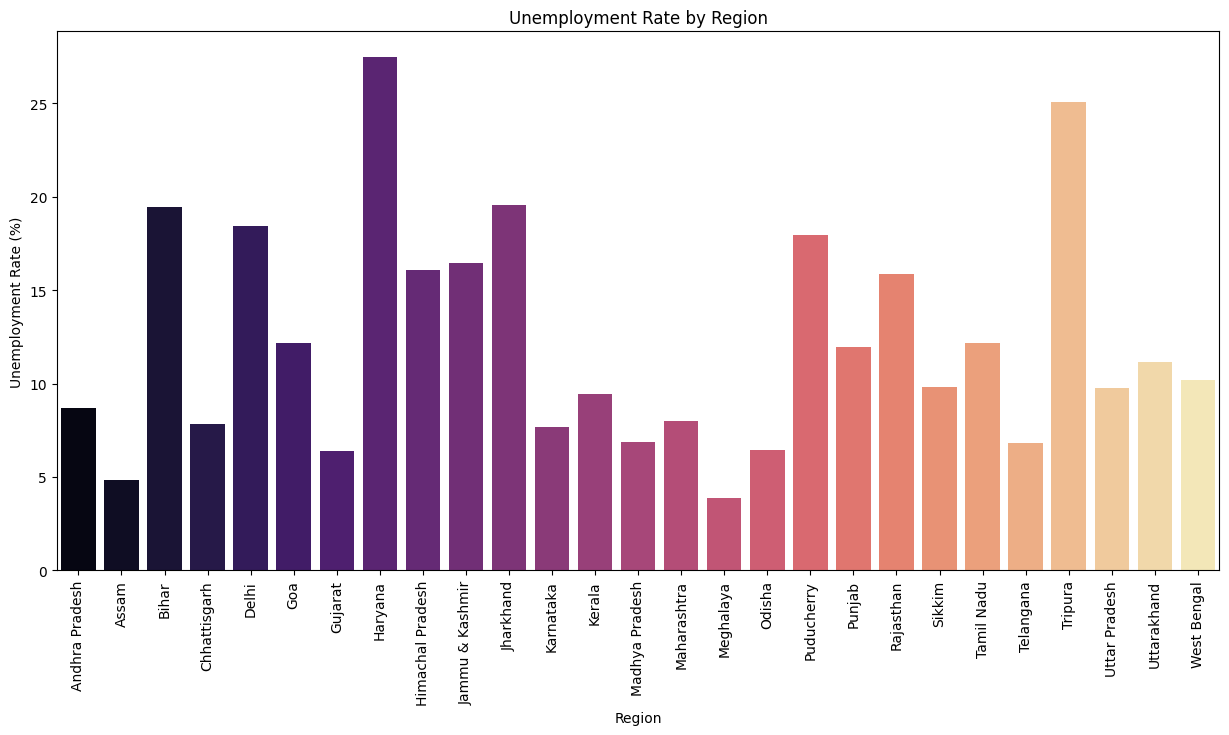

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(x="Region", y="Estimated Unemployment Rate (%)", data=df1, ci=None, palette="magma")
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Region")
plt.show()

In [ ]:
#Average Metrics by Region
avg_metrics = df.groupby('Region')[['Estimated Unemployment Rate (%)',
                                       'Estimated Labour Participation Rate (%)']].mean()
avg_metrics

,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%)
Region,,
Andhra Pradesh,7.477143,39.375714
Assam,6.428077,44.868462
Bihar,18.918214,38.153929
Chandigarh,15.991667,39.336667
Chhattisgarh,9.240357,42.810714
Delhi,16.495357,38.929643
Goa,9.274167,39.249583
Gujarat,6.663929,46.101071
Haryana,26.283214,42.737143


In [ ]:
avg_metrics1 = df1.groupby('Region')[['Estimated Unemployment Rate (%)',
                                       'Estimated Labour Participation Rate (%)']].mean()
avg_metrics1

,Estimated Unemployment Rate (%),Estimated Labour Participation Rate (%)
Region,,
Andhra Pradesh,8.664000,38.962000
Assam,4.856000,43.498000
Bihar,19.471000,37.173000
Chhattisgarh,7.819000,41.161000
Delhi,18.414000,35.857000
Goa,12.167000,39.242000
Gujarat,6.376000,45.490000
Haryana,27.477000,42.100000
Himachal Pradesh,16.065000,40.252000


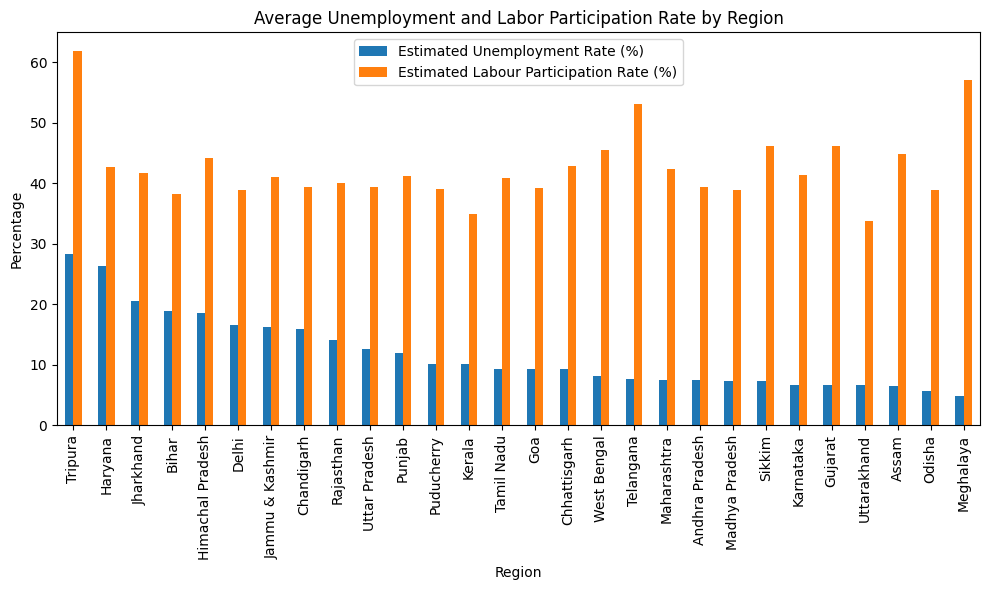

In [ ]:
# Average Unemployment Rate Plot
avg_metrics.sort_values(by="Estimated Unemployment Rate (%)", ascending=False).plot(kind="bar", figsize=(10, 6))
plt.title("Average Unemployment and Labor Participation Rate by Region")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

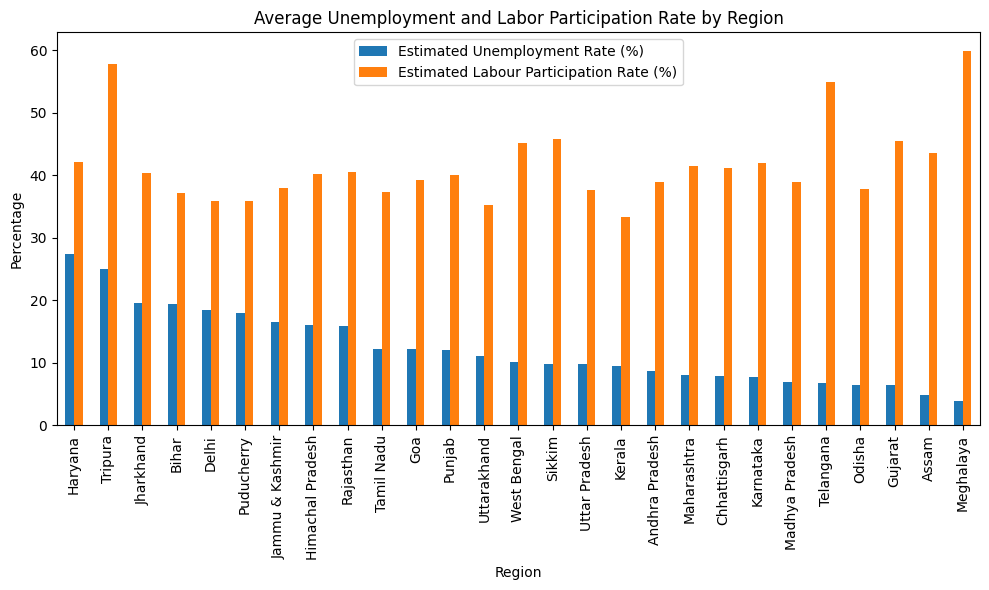

In [ ]:
avg_metrics1.sort_values(by="Estimated Unemployment Rate (%)", ascending=False).plot(kind="bar", figsize=(10, 6))
plt.title("Average Unemployment and Labor Participation Rate by Region")
plt.ylabel("Percentage")
plt.tight_layout()
plt.show()

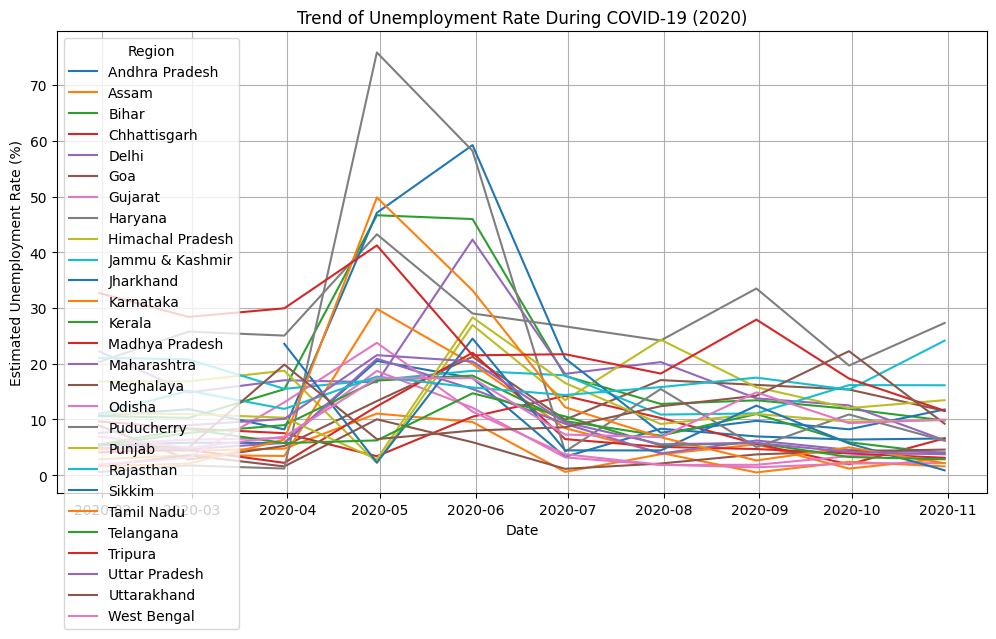

In [ ]:
# QUESTION 1: What was the overall trend in unemployment during COVID-19?
plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', palette='tab10')
plt.title("Trend of Unemployment Rate During COVID-19 (2020)")
plt.xlabel("Date")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.grid(True)
plt.show()

<ipython-input-42-2046a4475223>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='Region', y='Estimated Unemployment Rate (%)', palette='Set2')


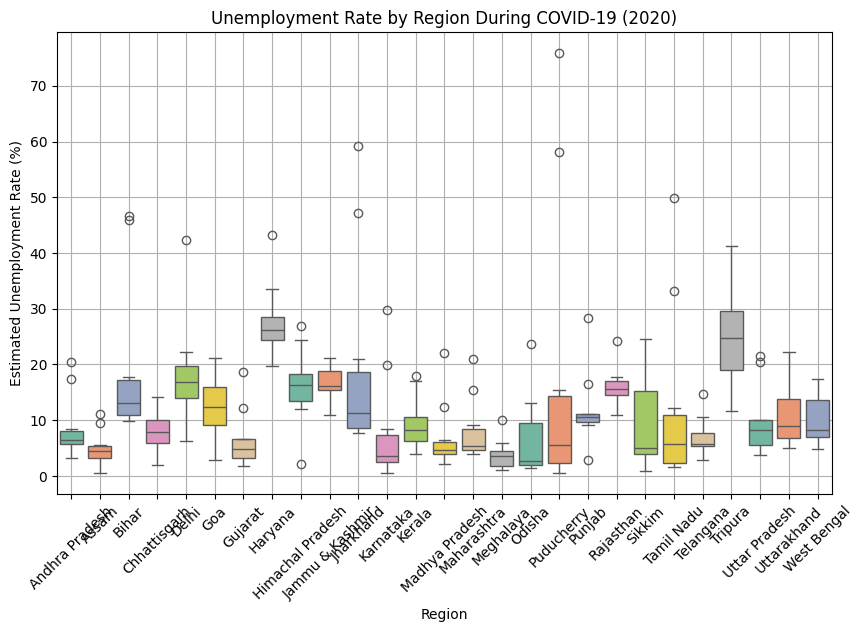

In [ ]:
# QUESTION 2: Which regions were most affected during the COVID-19 pandemic?
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Region', y='Estimated Unemployment Rate (%)', palette='Set2')
plt.title("Unemployment Rate by Region During COVID-19 (2020)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

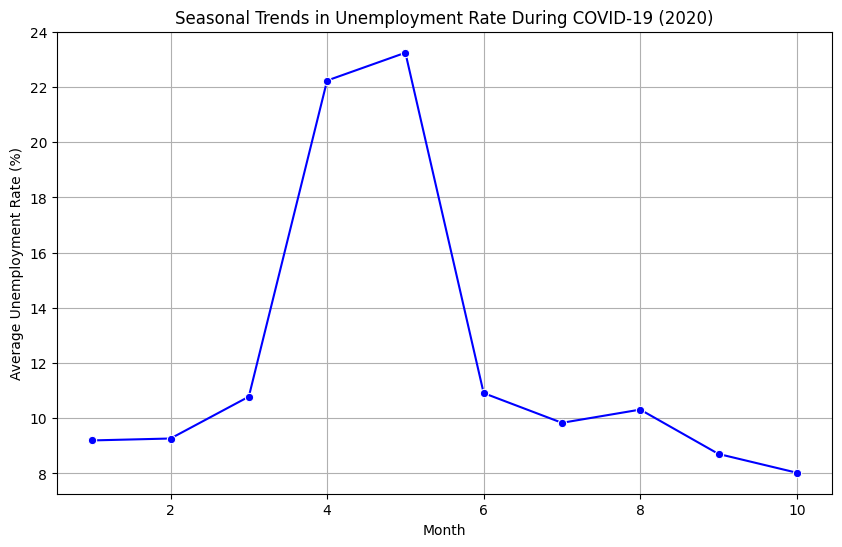

In [ ]:
# QUESTION 3: Were there any seasonal trends in unemployment during the pandemic?
df1['Month'] = df1['Date'].dt.month
monthly_avg = df1.groupby('Month')['Estimated Unemployment Rate (%)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Estimated Unemployment Rate (%)', data=monthly_avg, marker='o', color='blue')
plt.title("Seasonal Trends in Unemployment Rate During COVID-19 (2020)")
plt.xlabel("Month")
plt.ylabel("Average Unemployment Rate (%)")
plt.grid(True)
plt.show()

<ipython-input-44-57fd3e097b6f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.values, y=state_avg.index, palette='viridis')


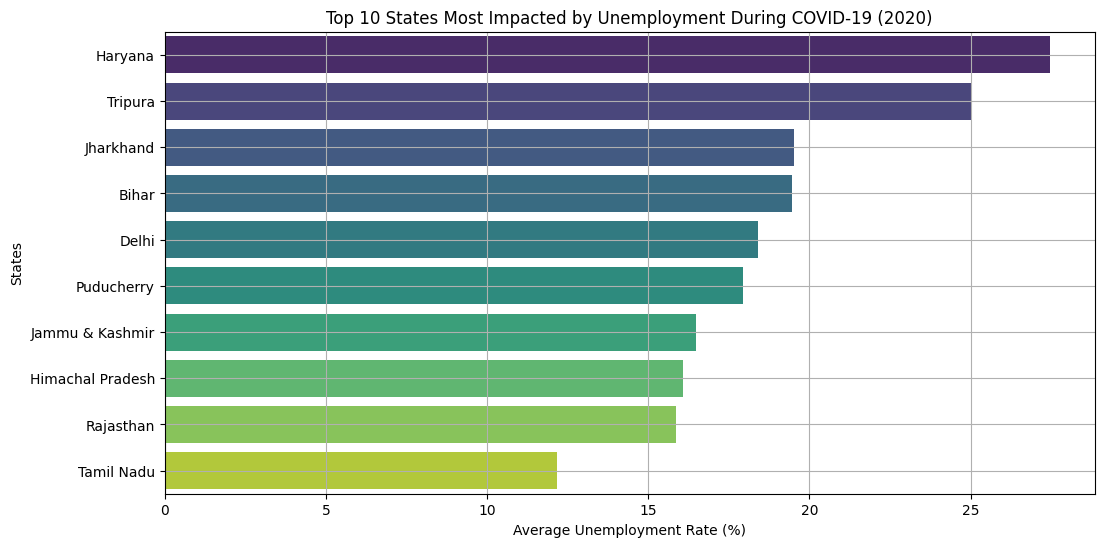

In [ ]:
# QUESTION 4: States most impacted by unemployment during COVID-19
state_avg = df1.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=state_avg.values, y=state_avg.index, palette='viridis')
plt.title("Top 10 States Most Impacted by Unemployment During COVID-19 (2020)")
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("States")
plt.grid(True)
plt.show()

In [ ]:
df['Area'].unique()

array(['Rural', nan, 'Urban'], dtype=object)

In [ ]:
df['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [ ]:
# Performing Label Encoding on object datatype for all the columns
encoder = LabelEncoder()

df['Region'] = encoder.fit_transform(df['Region'])

In [ ]:
df['Region']

,Region
0,0
1,0
2,0
3,0
4,0
...,...
736,27
737,27
738,27
739,27


In [ ]:
df1['Region'] = encoder.fit_transform(df1['Region'])

In [ ]:
df1['Region']

,Region
0,0
1,0
2,0
3,0
4,0
...,...
262,26
263,26
264,26
265,26


In [ ]:
df['Area'] = encoder.fit_transform(df['Area'])

In [ ]:
df['Area']

,Area
0,0
1,0
2,0
3,0
4,0
...,...
736,1
737,1
738,1
739,1


In [ ]:
df['Frequency'] = encoder.fit_transform(df['Frequency'])

In [ ]:
df['Frequency']

,Frequency
0,0
1,0
2,0
3,0
4,0
...,...
736,1
737,1
738,1
739,1


In [ ]:
df1['Frequency'] = encoder.fit_transform(df1['Frequency'])

In [ ]:
df1['Frequency']

,Frequency
0,0
1,0
2,0
3,0
4,0
...,...
262,0
263,0
264,0
265,0


In [ ]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,0,2019-05-31,0,3.65,11999139.0,43.24,0
1,0,2019-06-30,0,3.05,11755881.0,42.05,0
2,0,2019-07-31,0,3.75,12086707.0,43.50,0
3,0,2019-08-31,0,3.32,12285693.0,43.97,0
4,0,2019-09-30,0,5.17,12256762.0,44.68,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   741 non-null    int64         
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                741 non-null    int64         
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     741 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 40.7 KB


In [ ]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude,Month
0,0,2020-01-31,0,5.48,16635535,41.02,15.9129,79.74,1
1,0,2020-02-29,0,5.83,16545652,40.90,15.9129,79.74,2
2,0,2020-03-31,0,5.79,15881197,39.18,15.9129,79.74,3
3,0,2020-04-30,0,20.51,11336911,33.10,15.9129,79.74,4
4,0,2020-05-31,0,17.43,12988845,36.46,15.9129,79.74,5


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   267 non-null    int64         
 1   Date                                     267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    int64         
 3   Estimated Unemployment Rate (%)          267 non-null    float64       
 4   Estimated Employed                       267 non-null    int64         
 5   Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   longitude                                267 non-null    float64       
 7   latitude                                 267 non-null    float64       
 8   Month                                    267 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(1), 